In [5]:
from smtplib import SMTP
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email.utils import formatdate
from email import encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from seffaflik.elektrik import uretim

class SendingMail:
    def __init__(self,today,tomorrow,username,password):
        self.today = today
        self.tomorrow = tomorrow
        self.username = username
        self.password = password

    def eak_kgup(self):
        
        # COAL
        df = pd.read_csv('CoalKGUP.csv')
        df2 = pd.read_csv('CoalEAK.csv')
        df = df.set_index('DateTime')
        df2 = df2.set_index('DateTime')
        
        organizationID = ['40X100000000603N',
           '40X000000009083S',
           '40X0000000083216',
           '40X0000000006013',
           '40X0000000048313',
           '40X0000000090611',
           '40X000000008339O',
           '40X000000006498E',
           '40X000000011535G',
           '40X0000000067008',
           '40X000000010377D',
           '40X000000008360X',
           '40X000000007900W',
           '40X000000009162W',
           '40X000000007639H',
           '40X0000000132578',
           '40X0000000110333',
           '40X000000006999T',
           '40X000000000149W',
           '40X000000000369I'
           ]
        kgup1 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = "40X000000000195P")
        kgup1['DateTime'] = pd.to_datetime(kgup1.Tarih) + kgup1.Saat.astype('timedelta64[h]')
        kgup1 = kgup1.set_index('DateTime')
        kgup1 = pd.DataFrame(kgup1['Linyit'])
        kgup1 = kgup1.replace(np.nan, 0)

        kgup3 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = "40X000000000282U")
        kgup3['DateTime'] = pd.to_datetime(kgup3.Tarih) + kgup3.Saat.astype('timedelta64[h]')
        kgup3 = kgup3.set_index('DateTime')
        kgup3 = pd.DataFrame(kgup3['Linyit'])
        kgup3 = kgup3.replace(np.nan, 0)
    
        kgup1 = kgup1.reset_index(drop=False)
        kgup3 = kgup3.reset_index(drop=False)

        kgup1 = pd.merge(kgup1, kgup3, how="outer", on=["DateTime", "DateTime"])
        kgup1 = kgup1.set_index('DateTime')

        for i in range(len(organizationID)):
            kgup2 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = organizationID[i])
            kgup2['DateTime'] = pd.to_datetime(kgup2.Tarih) + kgup2.Saat.astype('timedelta64[h]')
            kgup2 = kgup2.drop('Tarih', axis = 1)
            kgup2 = kgup2.drop('Saat', axis = 1)
            kgup2 = kgup2.set_index('DateTime')
            kgup2 = pd.DataFrame(kgup2['Toplam'])
            kgup2 = kgup2.reset_index(drop=False)
            kgup1 = pd.merge(kgup1, kgup2, how="outer", on=["DateTime", "DateTime"])
            print("İşlem tamamlandı")
    
        kgup1 = kgup1.set_index('DateTime')
        kgup1 = kgup1.set_axis(['EUAS','ENERJISA TUFANBEYLI','ZETES EREN',
                      'ORHANELI TUNCBILEK','YATAGAN', 'SILOPI',
                      'ICDAS BEKIRLI', 'SOMA', 'YENIKOY KEMERKOY',
                      'SEYITOMER','HIDROGEN SOMA','KANGAL','CAN KOMUR',
                      'CATALAGZI','YUNUS EMRE','AKSA GOYNUK',
                      'ATLAS','ISKEN','CENAL','IZDEMIR','COLAKOGLU','ICDAS TERSANE'], axis=1, inplace=False)

        df = df.reset_index(drop=False)
        kgup1 = kgup1.reset_index(drop=False)
    
        df['DateTime'] = pd.to_datetime(df.DateTime)
        kgup1['DateTime'] = pd.to_datetime(kgup1.DateTime)

        df = df.set_index('DateTime')
        kgup1 = kgup1.set_index('DateTime')

        df = pd.concat([df, kgup1])
        df = df.reset_index(drop=False)
        df.drop_duplicates(subset="DateTime",keep = "last", inplace = True)
        df = df.set_index('DateTime')

        df.to_csv('CoalKGUP.csv', index = True)

        #EXPORTING PDF
        x = pd.read_csv('CoalKGUP.csv')
        x.tail(24).to_excel("Coal_KGUP.xlsx")
        fig, ax =plt.subplots(figsize=(12,4))
        ax.axis('off')
        the_table = ax.table(cellText=x[x.columns[0:11]].tail(24).values,colLabels=x.columns[0:11],loc='center', cellLoc='center')
        the_table.set_fontsize(35)
        plt.savefig("Coal1_KGUP.pdf", format="pdf", bbox_inches = 'tight')
        fig, ax =plt.subplots(figsize=(12,4))
        ax.axis('off')
        the_table = ax.table(cellText=x[x.columns[11:30]].tail(24).values,colLabels=x.columns[11:30],loc='center', cellLoc='center')
        the_table.set_fontsize(35)
        plt.savefig("Coal2_KGUP.pdf", format="pdf", bbox_inches = 'tight')


        # GAS
        df = pd.read_csv('GasKGUP.csv')
        df2 = pd.read_csv('GasEAK.csv')

        df = df.set_index('DateTime')
        df2 = df2.set_index('DateTime')

        organizationID = ['40X000000010814H',
           '40X000000000378H',
           '40X100000000181N',
           '40X000000000282U',
           '40X000000010372N',
           '40X000000000166W',
           '40X000000000396F',
           '40X000000000294N',
           '40X000000006839E',
           '40X0000000094882',
           '40X000000003625B',
           '40X100000001964N',
           '40X000000011810K',
           '40X0000000118168',
           '40X000000011997F',
           '40X000000011811I'
           ]

        kgup1 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = "40X000000000195P")
        kgup1['DateTime'] = pd.to_datetime(kgup1.Tarih) + kgup1.Saat.astype('timedelta64[h]')
        kgup1 = kgup1.set_index('DateTime')
        kgup1 = pd.DataFrame(kgup1['Doğalgaz'])
        kgup1 = kgup1.replace(np.nan, 0)

        for i in range(len(organizationID)):
            kgup2 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = organizationID[i])
            kgup2['DateTime'] = pd.to_datetime(kgup2.Tarih) + kgup2.Saat.astype('timedelta64[h]')
            kgup2 = kgup2.drop('Tarih', axis = 1)
            kgup2 = kgup2.drop('Saat', axis = 1)
            kgup2 = kgup2.set_index('DateTime')
            kgup2 = pd.DataFrame(kgup2['Doğalgaz'])
            kgup2 = kgup2.reset_index(drop=False)
            kgup1 = pd.merge(kgup1, kgup2, how="outer", on=["DateTime", "DateTime"])
            print("İşlem tamamlandı")
    
        kgup1 = kgup1.set_index('DateTime')
        kgup1 = kgup1.set_axis(['EUAS', 'KAZANSODA', 'HAMITABAT', 
                        'HABAS', 'ENERJISA BANDIRMA', 
                        'ACWA', 'AK ENERJI ERZIN', 
                        'AKSA ANTALYA', 'BILGIN SAMSUN',
                        'YENI ELEKTRIK','IC ANADOLU','RWE TURCAS',
                        'CENGIZ 610','ENKA ADAPAZARI', 'BAYMINA','İZMİR', 'GEBZE'], axis=1, inplace=False)

        df = df.reset_index(drop=False)
        kgup1 = kgup1.reset_index(drop=False)
        
        df['DateTime'] = pd.to_datetime(df.DateTime)
        kgup1['DateTime'] = pd.to_datetime(kgup1.DateTime)

        df = df.set_index('DateTime')
        kgup1 = kgup1.set_index('DateTime')

        df = pd.concat([df, kgup1])
        df = df.reset_index(drop=False)
        df.drop_duplicates(subset="DateTime",keep = "last", inplace = True)
        df = df.set_index('DateTime')
        df.to_csv('GasKGUP.csv', index = True)

        # EXPORTING PDF
        x = pd.read_csv('GasKGUP.csv')

        x.tail(24).to_excel("Gas_KGUP.xlsx")

        fig, ax =plt.subplots(figsize=(12,4))
        ax.axis('off')
        the_table = ax.table(cellText=x[x.columns[0:9]].tail(24).values,colLabels=x.columns[0:9],loc='center', cellLoc='center')
        the_table.set_fontsize(35)
        plt.savefig("Gas1_KGUP.pdf", format="pdf", bbox_inches = 'tight')

        fig, ax =plt.subplots(figsize=(12,4))
        ax.axis('off')
        the_table = ax.table(cellText=x[x.columns[9:18]].tail(24).values,colLabels=x.columns[9:18],loc='center', cellLoc='center')
        the_table.set_fontsize(35)
        plt.savefig("Gas2_KGUP.pdf", format="pdf", bbox_inches = 'tight')

        # HYDRO
        df = pd.read_csv('HidroKGUP.csv')
        df2 = pd.read_csv('HidroEAK.csv')

        df = df.set_index('DateTime')
        df2 = df2.set_index('DateTime')

        organizationID = ['40X000000011074Q',
           '40X0000000082430',
           '40X0000000001348',
           '40X0000000056340',
           '40X000000012897E',
           '40X0000000038342',
           '40X000000009422W',
           '40X0000000056502',
           '40X000000000282U',
           '40X000000000195P',
           '40X000000000195P',
           '40X000000000195P',
           '40X000000000195P',
           '40X000000000195P'
           ]

        uevcb = ['40W0000000007330',
         '40W000000000736V',
         '40W000000000744W',
         '40W000003196807U',
         '40W000000335652A',]

        # KGUP
        kgup1 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = "40X000000000195P")
        kgup1['DateTime'] = pd.to_datetime(kgup1.Tarih) + kgup1.Saat.astype('timedelta64[h]')
        kgup1 = kgup1.set_index('DateTime')
        kgup1 = pd.DataFrame(kgup1['Barajlı'])
        kgup1 = kgup1.replace(np.nan, 0)

        j = 0
        count = 1

        for i in range(len(organizationID)):
    
            if count < 10:
                kgup2 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = organizationID[i])
                kgup2['DateTime'] = pd.to_datetime(kgup2.Tarih) + kgup2.Saat.astype('timedelta64[h]')
                kgup2 = kgup2.drop('Tarih', axis = 1)
                kgup2 = kgup2.drop('Saat', axis = 1)
                kgup2 = kgup2.set_index('DateTime')
                kgup2 = pd.DataFrame(kgup2['Barajlı'])
                kgup2 = kgup2.reset_index(drop=False)
                kgup1 = pd.merge(kgup1, kgup2, how="outer", on=["DateTime", "DateTime"])
                print("İşlem tamamlandı")
                count = count + 1
    
            else:
                kgup2 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow, organizasyon_eic = organizationID[i], uevcb_eic = uevcb[j])
                kgup2['DateTime'] = pd.to_datetime(kgup2.Tarih) + kgup2.Saat.astype('timedelta64[h]')
                kgup2 = kgup2.drop('Tarih', axis = 1)
                kgup2 = kgup2.drop('Saat', axis = 1)
                kgup2 = kgup2.set_index('DateTime')
                kgup2 = pd.DataFrame(kgup2['Barajlı'])
                kgup2 = kgup2.reset_index(drop=False)
                kgup1 = pd.merge(kgup1, kgup2, how="outer", on=["DateTime", "DateTime"])
                print("İşlem tamamlandı")
                j = j + 1
                count = count + 1
    
        kgup1 = kgup1.set_index('DateTime')
        kgup1 = kgup1.set_axis(['EUAS', 'KALEHAN KALE ENERJI', 'KALEHAN BEYHAN1', 
                        'OYMAPINAR', 'BOYABAT', 
                        'KALEHAN ASAGI KALEKOY', 'LIMAK', 
                        'DOGUS ARTVIN', 'SANKO','ENERJISA',
                        'ATATURK', 'KARAKAYA', 'KEBAN', 
                        'BIRECIK', 'DERINER'], axis=1, inplace=False)

        df = df.reset_index(drop=False)
        kgup1 = kgup1.reset_index(drop=False)
        
        df['DateTime'] = pd.to_datetime(df.DateTime)
        kgup1['DateTime'] = pd.to_datetime(kgup1.DateTime)
        
        df = df.set_index('DateTime')
        kgup1 = kgup1.set_index('DateTime')

        df = pd.concat([df, kgup1])
        df = df.reset_index(drop=False)
        df.drop_duplicates(subset="DateTime",keep = "last", inplace = True)
        df = df.set_index('DateTime')

        df.to_csv('HidroKGUP.csv', index = True)

        # EXPORTING PDF

        x = pd.read_csv('HidroKGUP.csv')

        x.tail(24).to_excel("Hydro_KGUP.xlsx")

        fig, ax =plt.subplots(figsize=(12,4))
        ax.axis('off')
        the_table = ax.table(cellText=x[x.columns[0:8]].tail(24).values, colLabels = x.columns[0:8], loc='center', cellLoc='center')
        the_table.set_fontsize(35)
        plt.savefig("Hydro1_KGUP.pdf", format="pdf", bbox_inches = 'tight')

        fig, ax =plt.subplots(figsize=(12,4))
        ax.axis('off')
        the_table = ax.table(cellText=x[x.columns[8:16]].tail(24).values, colLabels = x.columns[8:16], loc='center', cellLoc='center')
        the_table.set_fontsize(35)
        plt.savefig("Hydro2_KGUP.pdf", format="pdf", bbox_inches = 'tight')

    def org_check(self):

        x = uretim.tum_organizasyonlar_kgup(baslangic_tarihi=self.today, bitis_tarihi=self.tomorrow)

        x['DateTime'] = pd.to_datetime(x.Tarih) + x.Saat.astype('timedelta64[h]')
        x.drop(['Tarih','Saat'],axis=1,inplace=True)
        x.set_index('DateTime',inplace=True)

        ayin4u = x.loc[:'{} 23:00:00'.format(self.today)]
        ayin5i = x.loc['{} 00:00:00'.format(self.tomorrow):]

        df1 = ayin4u.copy()
        df2 = ayin5i.copy()

        df1.reset_index(inplace=True)
        df2.reset_index(inplace=True)

        df1.drop('DateTime',axis=1,inplace=True)
        df2.drop('DateTime',axis=1,inplace=True)
        new = df2-df1 
        toplamlar = pd.DataFrame(new[new.columns].sum())
        toplamlar.rename(columns = {0:'KGÜP'},inplace=True) 
        toplamlar.sort_values(by='KGÜP',ascending=False) 

        maxx = toplamlar.sort_values(by='KGÜP',ascending=False).head(15)
        minn = toplamlar.sort_values(by='KGÜP',ascending=False).tail(15)
        # EXPORTING PDF
        fig, ax =plt.subplots(figsize=(3,1))
        ax.axis('off')
        the_table = ax.table(cellText = maxx.values, rowLabels = maxx.index, loc='center', colLabels = maxx.columns, cellLoc='center')
        the_table.set_fontsize(8)
        plt.savefig("MAX.pdf", format="pdf", bbox_inches = 'tight')
        the_table = ax.table(cellText = minn.values, rowLabels = minn.index, loc='center', colLabels = minn.columns, cellLoc='center')
        the_table.set_fontsize(8)
        plt.savefig("MIN.pdf", format="pdf", bbox_inches = 'tight')
        
        # KGÜP RAPOR
        def dunbugunfark(string1):
            if string1 in karisik:        

                kgup1 = uretim.kgup(baslangic_tarihi=self.today, bitis_tarihi=self.today, organizasyon_eic = organizationID[karisik.index(string1)])
                kgup2 = uretim.kgup(baslangic_tarihi=self.tomorrow, bitis_tarihi=self.tomorrow, organizasyon_eic = organizationID[karisik.index(string1)])
                kgup1['DateTime'] = pd.to_datetime(kgup1.Tarih) + kgup1.Saat.astype('timedelta64[h]')
                kgup2['DateTime'] = pd.to_datetime(kgup2.Tarih) + kgup2.Saat.astype('timedelta64[h]')

                result = kgup2.subtract(kgup1, fill_value=0)
                result.loc['Total'] = result.sum()

                result.drop('Tarih',axis=1,inplace=True)
                result.drop('Saat',axis=1,inplace=True)
                result.drop('DateTime',axis=1,inplace=True)

            for iteration in range(result.shape[1]):
                if result.iloc[24][iteration] < 0:
                    integer = result.iloc[24][iteration]
                    string1 = result.columns[iteration]
                    print(" %s'da %.2f AZALMA olmuştur." % (string1.upper(),integer))
                if result.iloc[24][iteration] > 0:
                    integer = result.iloc[24][iteration]
                    string1 = result.columns[iteration]
                    print(" %s'da %.2f ARTIŞ olmuştur." % (string1.upper(),integer))
                else:
                    print("Please try again!")

        santraller = ['GEBZE','ADAPAZARI','İÇDAŞ',
              'İÇDAŞ ÇLK','RWE','BAYMİNA',
              'ACWA','İZMİR','AKSA EÜ',
              'CNL','EREN', 'KANGAL T.',
              'YATAĞAN','ATLAS EN.','İÇ_ANADOLU',
              'İSKEN','SOMATERMİK','ÇAN 2','YENİKÖY K.', 'YENİ']

        karisik = ['ENERJİSAEÜ','EÜAŞ',
           'BİLGİN GÜÇ','AKENRJİ']

        organizationID = ['40X000000000282U',
                  '40X000000000195P',
                  '40X000000000294N',
                  '40X000000000166W']
                                               
        # AZALANLAR
        a=0
        for i in range(len(minn)):
            if minn.index.values[-i] in santraller: 
                first = df1[minn.index.values[-i]].mean()
                second = df2[minn.index.values[-i]].mean()
                print("\n %s santralinde bugünün ortalama KGÜP'ü %.0f MW iken, yarının ortalama KGÜP'ü %.0f MW azalmıştır.\n" % (minn.index.values[-i],first,second))
                a = a + 1
            elif minn.index.values[-i] in karisik:
                print("\n",minn.index.values[-i],"organizasyonunda")
                dunbugunfark(minn.index.values[-i])
                a = a + 1
            if a == 15:
                break

        # ARTANLAR
        a=0
        for i in range(len(maxx)):
            if maxx.index.values[i] in santraller: 
                first = df1[maxx.index.values[i]].mean()
                second = df2[maxx.index.values[i]].mean()
                print("\n %s santralinde bugünün ortalama KGÜP'ü %.0f MW iken, yarının ortalama KGÜP'ü %.0f MW artmıştır.\n" % (maxx.index.values[i],first,second))
                a = a + 1 
            elif maxx.index.values[i] in karisik:
                print("\n",maxx.index.values[i],"organizasyonunda")
                dunbugunfark(maxx.index.values[i])
                a = a + 1
            if a == 15:
                break
            
    def send_mail(self):
        today2 = datetime.strftime(datetime.now(), '%d %B %Y')
        isTls=True
        send_to = "toygar.ulgen@nykenerji.com"
        subject = "{} KGÜP Raporları".format(today2)
        text = "Merhabalar,\n\n{} KGÜP raporları ektedir.\n\n".format(today2)
        server = SMTP('smtp.office365.com', 587)
        msg = MIMEMultipart()
        msg['From'] = self.username
        msg['To'] = send_to
        msg['Date'] = formatdate(localtime = True)
        msg['Subject'] = subject
        msg['Cc'] = "toygar.ulgen@ozu.edu.tr"
        msg.attach(MIMEText(text))
        
        filenames = ['MAX.pdf', 'MIN.pdf','Hydro1_KGUP.pdf', 'Hydro2_KGUP.pdf', 'Gas1_KGUP.pdf',
                     'Gas2_KGUP.pdf', 'Coal1_KGUP.pdf', 'Coal2_KGUP.pdf',
                     'Hydro_KGUP.xlsx', 'Gas_KGUP.xlsx', 'Coal_KGUP.xlsx']
    
        for filename in filenames:
            with open(filename, 'r') as part:
                part = MIMEBase('application', "octet-stream")
                part.set_payload(open(filename, "rb").read())
                encoders.encode_base64(part)
                part.add_header('Content-Disposition', 'attachment; filename={}"'.format(filename))
            msg.attach(part)
            
        if isTls:
            server.starttls()
        server.login(self.username,self.password)
        server.sendmail(self.username, send_to, msg.as_string())
        server.quit()
        print("MAIL HAS SENT")




İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı
İşlem tamamlandı

 EÜAŞ organizasyonunda
 DOĞALGAZ'da -5730.00 AZALMA olmuştur.
Please try again!
 BARAJLI'da -2544.00 AZALMA olmuştur.
Please try again!
 LINYIT'da -2

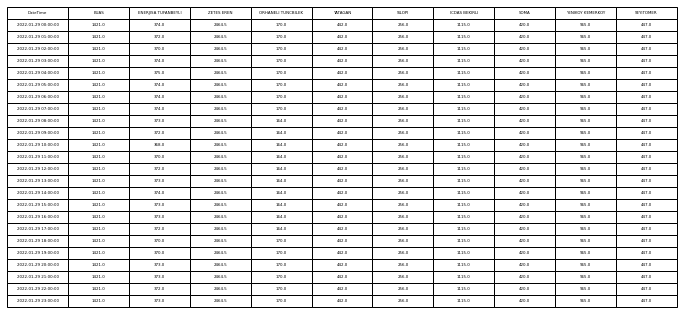

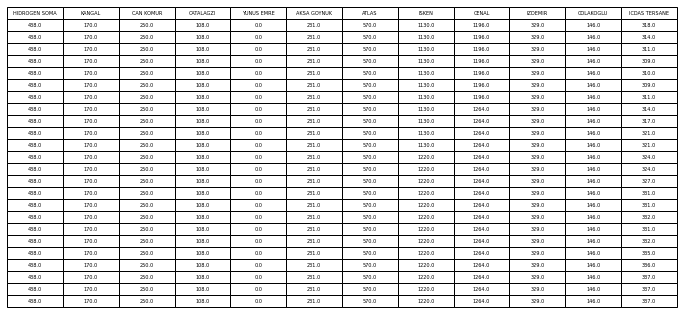

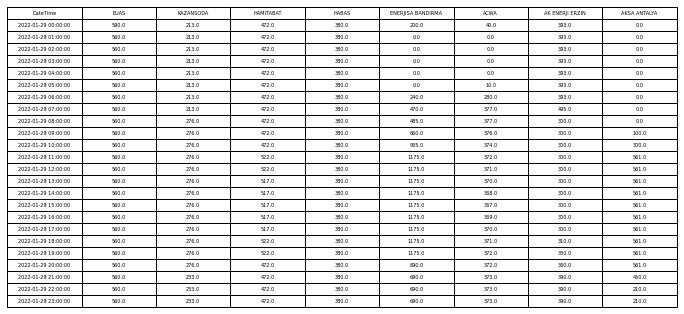

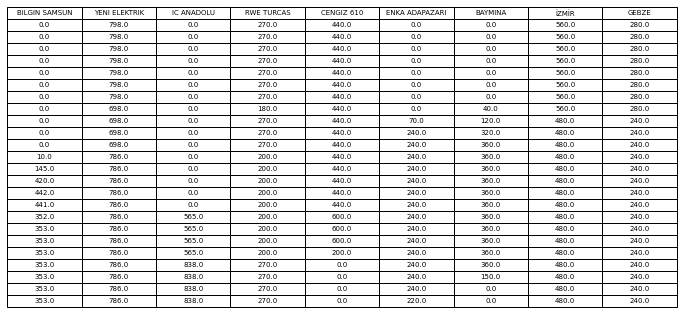

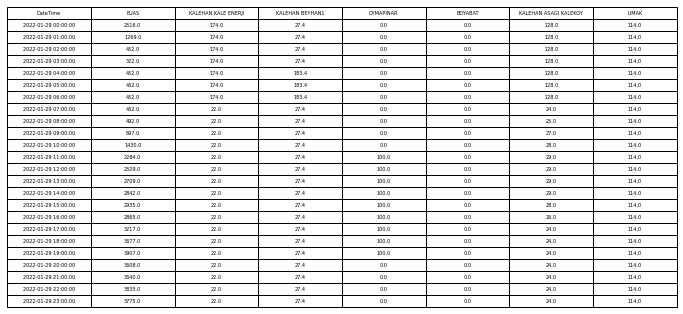

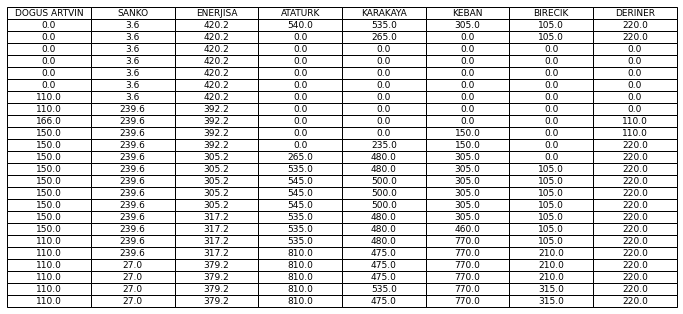

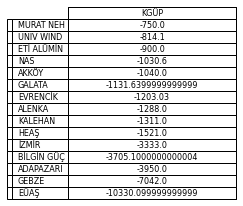

In [6]:
presentday = datetime.now()
tomorrow = (presentday + timedelta(1)).strftime('%Y-%m-%d')
today = datetime.strftime(datetime.now(), '%Y-%m-%d')

lastresult=SendingMail(today,tomorrow,"toygar.ulgen@nykenerji.com","Vub83937")
lastresult.eak_kgup()
lastresult.org_check()
lastresult.send_mail()